In [1]:
# %matplotlib inline

from qtl_control.station import parse_config_to_station
from qtl_control.qtl_experiments.database import FileSystemDB
from qtl_control.qtl_experiments.experiment import QTLExperiment

station = parse_config_to_station("tests/test_station.yaml")
db = FileSystemDB("test_db", "tests/")
QTLExperiment.default_db = db
QTLExperiment.default_station = station

Opened DB with last id: 86


In [2]:
_, test_conf0 = station.new_configuration("test0")
_, test_conf1 = station.new_configuration("test1")

In [3]:
test_conf0

{'root': {'combined_controller_0': {'hw_controller_0': {'amplitude': 0},
   'abstract_controller_0': {}},
  'vna_controller': {'span': Ellipsis,
   'center_frequency': Ellipsis,
   'power': Ellipsis}}}

In [4]:
station.change_settings({"combined_controller_0.hw_controller_0.amplitude": 2})

setting MockHW amplitude to 2


In [5]:
_, test_conf1 = station.new_configuration("test1")

In [6]:
station.get_module_methods("RandSModule")

['get_frequency_trace']

In [7]:
station.run_module_method("RandSModule", "get_frequency_trace", "vna_controller")

([6000000000.0, 6100000000.0, 6200000000.0, 6300000000.0],
 [(3+0j), (2+0.1j), (5-0.7j), 1])

In [8]:
station.external_sweeps(
    [
        {"combined_controller_0.hw_controller_0.amplitude": 0.1},
        {"combined_controller_0.hw_controller_0.amplitude": 0.2}
    ],
    "RandSModule",
    "get_frequency_trace",
    "vna_controller"
)

setting MockHW amplitude to 0.1
setting MockHW amplitude to 0.2
setting MockHW amplitude to 2


[([6000000000.0, 6100000000.0, 6200000000.0, 6300000000.0],
  [(3+0j), (2+0.1j), (5-0.7j), 1]),
 ([6000000000.0, 6100000000.0, 6200000000.0, 6300000000.0],
  [(3+0j), (2+0.1j), (5-0.7j), 1])]

In [9]:
station.get_configuration()

{'root': {'combined_controller_0': {'hw_controller_0': {'amplitude': 2},
   'abstract_controller_0': {}},
  'vna_controller': {'span': Ellipsis,
   'center_frequency': Ellipsis,
   'power': Ellipsis}}}

In [10]:
from qtl_control.qtl_experiments.experiment import VNATrace
import matplotlib.pyplot as plt
vna_trace = VNATrace()

In [11]:
ds_temp = vna_trace.run("vna_controller")
ds_temp

(87,
 <xarray.Dataset> Size: 96B
 Dimensions:    (frequency: 4)
 Coordinates:
   * frequency  (frequency) float64 32B 6e+09 6.1e+09 6.2e+09 6.3e+09
 Data variables:
     Sparam     (frequency) complex128 64B (3+0j) (2+0.1j) (5-0.7j) (1+0j))

In [12]:
db_id, data = vna_trace.run("vna_controller")
vna_trace.plot(data)


In [13]:
db_id, data = vna_trace.run("vna_controller", "combined_controller_0.hw_controller_0.amplitude", [0, 0.1, 0.2])

setting MockHW amplitude to 0
setting MockHW amplitude to 0.1
setting MockHW amplitude to 0.2
setting MockHW amplitude to 2


In [14]:
vna_trace.plot(data)

In [15]:
import numpy as np
data["Sparam"]

<xarray.DataArray 'Sparam' (combined_controller_0.hw_controller_0.amplitude: 3,
                            frequency: 4)> Size: 192B
array([[3.+0.j , 2.+0.1j, 5.-0.7j, 1.+0.j ],
       [3.+0.j , 2.+0.1j, 5.-0.7j, 1.+0.j ],
       [3.+0.j , 2.+0.1j, 5.-0.7j, 1.+0.j ]])
Coordinates:
  * combined_controller_0.hw_controller_0.amplitude  (combined_controller_0.hw_controller_0.amplitude) float64 24B ...
  * frequency                                        (frequency) float64 32B ...

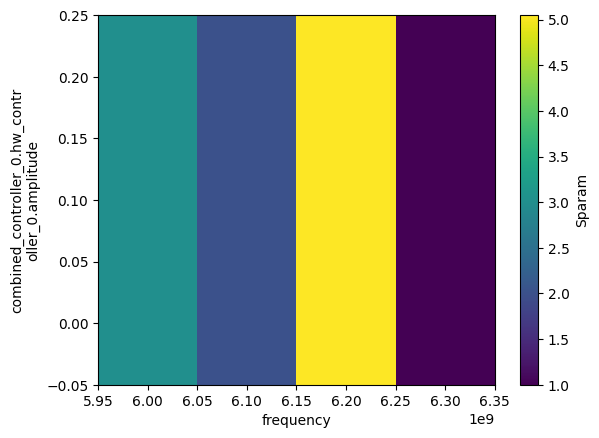

In [ ]:
abs_data = np.abs(data["Sparam"])
abs_data.plot()
plt.show()